In [1]:
from nltk.tokenize import sent_tokenize
import pymorphy2 as morph
import gensim
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
text = open('Harry.txt', encoding='utf-8').read()

In [3]:
sents = sent_tokenize(text)

In [4]:
m = morph.MorphAnalyzer()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
sw = stopwords.words('russian')
new_sents = []
for sent in sents:
    new_words = []
    words = word_tokenize(sent)
    for word in words:
        if word not in sw and word.isalpha():
            word = m.parse(word)[0].normal_form
            new_words.append(word)
    new_sents.append(' '.join(new_words))
new_sents

['джоана роулинга гарри поттер тайный комната это два книга приключение гарри поттер',
 'он снова вступать отчаянный схватка зло',
 'на враг силённый надежда победа',
 'в школа чародейство волшебство хогвартс происходить тревожный событие',
 'нападать ученик школа преподаватель подозревать это таинственный чудовище который скрываться легендарный тайна комната',
 'гарри поттер друг разгадывать загадка тайна комната гарри снова предстоять сразиться лорд',
 'суметь победить',
 'марин дмитрий литвинов дж',
 'ролинг',
 'гарри поттер тайный комната росмэн дж',
 'ролинг гарри поттер тайный комната глава день рождение худой некуда в дом тисовый улица время завтрак разразиться очередной скандал',
 'ранний утром мистер вернона дурсль проснуться громкий ухание сова долететь комната племянник',
 'три неделя',
 'прореветь садиться глава стол',
 'вышвырнуть её немедленно коль уметь управляться',
 'сова клетка скучно который приняться объяснять гарри',
 'она вольный птица',
 'хорошо выпускать её ночь

In [9]:
with open('Harry_new.txt', 'w', encoding='utf-8') as f:
    for sent in new_sents:
        f.write(sent + '\n')

In [10]:
f = 'Harry_new.txt'
data = gensim.models.word2vec.LineSentence(f)

In [11]:
model_harry = gensim.models.Word2Vec(data, size=300, window=5, min_count=2)

In [12]:
model_harry.init_sims(replace=True)
model_path = "harry.bin"

print("Saving model...")
model_harry.wv.save_word2vec_format(model_path, binary=True)

Saving model...


In [13]:
print(len(model_harry.wv.vocab))

4590


In [31]:
model_harry.wv.most_similar("сова", topn=5)

[('который', 0.9995200634002686),
 ('глаз', 0.9995174407958984),
 ('ещё', 0.9995172023773193),
 ('локонс', 0.9995160102844238),
 ('гермиона', 0.9995146989822388)]

In [34]:
model_harry.wv.most_similar("смелость", topn=5)

[('окинуть', 0.8910574316978455),
 ('ли', 0.8895643949508667),
 ('колонна', 0.8893017768859863),
 ('край', 0.8890871405601501),
 ('ботинок', 0.8890581130981445)]

In [35]:
model_harry.wv.most_similar("гарри", topn=5)

[('который', 0.9999827742576599),
 ('глаз', 0.9999769926071167),
 ('рон', 0.9999769330024719),
 ('весь', 0.999973714351654),
 ('рука', 0.9999736547470093)]

In [169]:
model_harry.wv.most_similar("хороший", topn=5)

[('который', 0.9998569488525391),
 ('гарри', 0.9998551607131958),
 ('локонс', 0.99985271692276),
 ('тот', 0.9998498558998108),
 ('один', 0.9998492002487183)]

In [37]:
model_harry.wv.most_similar("плохой", topn=5)

[('сторона', 0.9963682293891907),
 ('макгонагалл', 0.9963679909706116),
 ('стена', 0.9963624477386475),
 ('урок', 0.996361255645752),
 ('змея', 0.996357798576355)]

In [46]:
print(model_harry.most_similar(positive=['фред', 'гарри'], negative=['джордж'])[0][0])

рон


In [72]:
print(model_harry.doesnt_match('драко фред джордж перси джинни макгонагалл'.split()))

драко


In [170]:
print(model_harry.doesnt_match('гриффиндор слизерин пуфендовать когтеврать'.split()))

когтеврать


In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

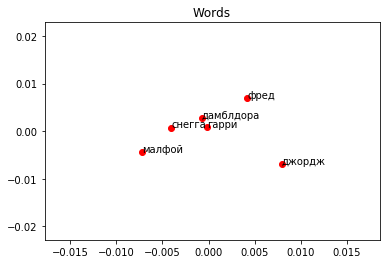

In [139]:
words = ['джордж', 'гарри', 'фред', 'дамблдора', 'малфой', 'снегга']
X = model_harry[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

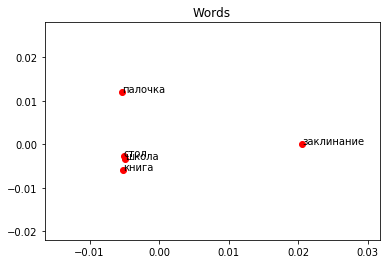

In [182]:
words = ['книга', 'стол', 'палочка', 'заклинание', 'школа']
X = model_harry[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()